In [24]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split;


In [25]:

## Add seed to ensure reproducabilty
np.random.seed(42)
random.seed(42)

## Load dataset

In [26]:
course_df = pd.read_csv("course_data.csv")

In [27]:
course_df.sample(10)

,INITCAP,ACTCAP,WL_CAP,TERM,num_gradute,num_admited,Crse,Subj,CRN
1483,200,164,0,Summer,187,681,6035,CS,39081
12892,550,536,0,Spring,127,357,6035,CS,39081
1175,50,25,0,Summer,135,629,6035,CS,39081
6554,450,427,0,Fall,111,404,6035,CS,39081
11039,600,608,8,Spring,179,524,6035,CS,39081
12032,999,993,0,Spring,158,331,6035,CS,39081
9217,350,354,4,Spring,164,397,6035,CS,39081
908,200,179,0,Summer,196,512,6035,CS,39081
10419,750,768,18,Spring,146,622,6035,CS,39081
399,300,309,9,Summer,106,285,6035,CS,39081


## Quick data summary

In [28]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   INITCAP      13500 non-null  int64 
 1   ACTCAP       13500 non-null  int64 
 2   WL_CAP       13500 non-null  int64 
 3   TERM         13500 non-null  object
 4   num_gradute  13500 non-null  int64 
 5   num_admited  13500 non-null  int64 
 6   Crse         13500 non-null  int64 
 7   Subj         13500 non-null  object
 8   CRN          13500 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 949.3+ KB


In [29]:
course_df.describe()

,INITCAP,ACTCAP,WL_CAP,num_gradute,num_admited,Crse,CRN
count,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.0,13500.0
mean,449.555556,439.728148,3.519778,149.392296,474.742296,6035.0,39081.0
std,276.314995,277.011104,6.010188,28.723973,130.317116,0.0,0.0
min,50.000000,10.000000,0.000000,100.000000,250.000000,6035.0,39081.0
25%,200.000000,206.000000,0.000000,125.000000,362.000000,6035.0,39081.0
50%,450.000000,423.000000,0.000000,149.000000,474.000000,6035.0,39081.0
75%,600.000000,599.000000,6.000000,174.000000,588.000000,6035.0,39081.0
max,999.000000,1019.000000,20.000000,199.000000,699.000000,6035.0,39081.0


In [30]:
## Check for missing values
course_df.isnull().sum()

INITCAP        0
ACTCAP         0
WL_CAP         0
TERM           0
num_gradute    0
num_admited    0
Crse           0
Subj           0
CRN            0
dtype: int64

In [31]:
course_df_cat = course_df.select_dtypes(include=["object"])

In [32]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
course_df_num = course_df.select_dtypes(include=numerics)

## Analysis of numerical features

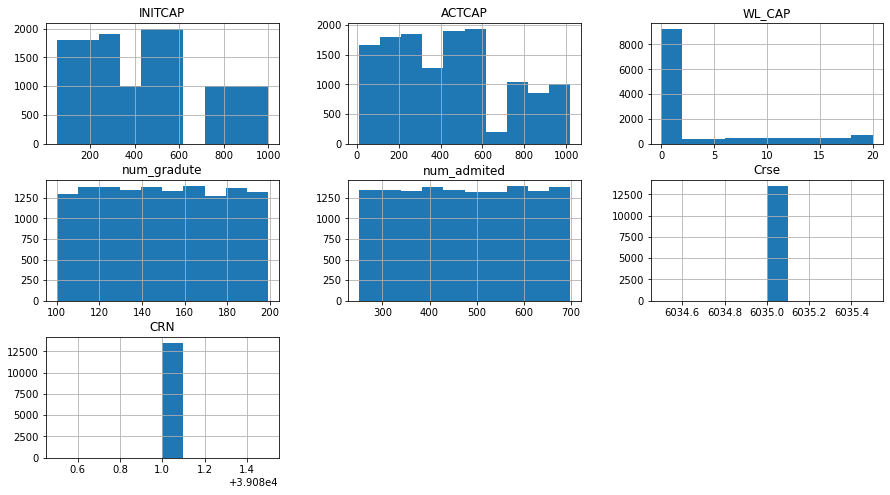

In [33]:
course_df_num.hist(figsize=(15,8));

## Analysis of the target value

In [34]:
course_df_num.columns

Index(['INITCAP', 'ACTCAP', 'WL_CAP', 'num_gradute', 'num_admited', 'Crse',
       'CRN'],
      dtype='object')

In [35]:

course_df_num.ACTCAP.value_counts()

313    55
318    54
316    52
169    50
314    47
       ..
327     7
449     6
964     6
846     5
448     5
Name: ACTCAP, Length: 716, dtype: int64

<AxesSubplot:>

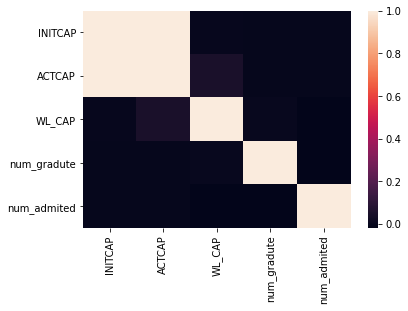

In [36]:
## Look for correlation
sns.heatmap(course_df_num[["INITCAP", "ACTCAP", "WL_CAP", "num_gradute", "num_admited"]].corr())

## Split data

In [37]:
# Use stratify split to ensure data balance

In [38]:
train, test = train_test_split(course_df, test_size=0.2, random_state=42, shuffle=True, stratify=course_df["ACTCAP"])

In [39]:
## Save split data
train.to_csv("train.csv", index=False)
test.to_csv("valid.csv" , index=False)